# darknet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
!cd "/content/drive/MyDrive/darknet"; head Makefile  

GPU=1
CUDNN=1
CUDNN_HALF=1
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



## 修改 Makefile
- GPU=1
- CUDNN=1
- OPENCV=1

In [ ]:
!sed -i "s/GPU=0/GPU=1/g" /content/drive/MyDrive/darknet/Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" /content/drive/MyDrive/darknet/Makefile
!sed -i "s/CUDNN_HALF=0/CUDNN_HALF=1/g" /content/drive/MyDrive/darknet/Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" /content/drive/MyDrive/darknet/Makefile

In [ ]:
!head /content/drive/MyDrive/darknet/Makefile  

## 編譯 darknet

In [ ]:
!cd /content/drive/MyDrive/darknet; make

chmod +x *.sh


# Face_detection

In [ ]:
%cd /content/drive/MyDrive/Face_detection

/content/drive/MyDrive/Face_detection


In [ ]:
import os
import shutil

if not os.path.exists("cfg"):
  os.mkdir("cfg") 
  os.mkdir("cfg/weights")

if not os.path.exists("cfg/face.data"):
  shutil.copyfile("../darknet/cfg/coco.data", "cfg/face.data")

if not os.path.exists("cfg/face.names"):
  shutil.copyfile("../darknet/cfg/coco.names", "cfg/face.names")  

In [ ]:
!head cfg/face.data

classes= 2
train = ../Face_detection/cfg/train.txt
valid = ../Face_detection/cfg/val.txt
names = ../Face_detection/cfg/face.names
backup = ../Face_detection/cfg/weights/


In [ ]:
!head cfg/face.names

fake
real


## 更改 face.data, face.names 內容

In [ ]:
!echo -e 'fake\nreal' > cfg/face.names
!echo -e 'classes= 2\ntrain = ../Face_detection/cfg/train.txt\nvalid = ../Face_detection/cfg/val.txt\nnames = ../Face_detection/cfg/face.names\nbackup = ../Face_detection/cfg/weights/' > cfg/face.data

In [ ]:
!head cfg/face.names

In [ ]:
!head cfg/face.data

## 修改 yolov4-tiny.cfg

In [ ]:
%cd /content/drive/MyDrive/Face_detection

In [ ]:
!cp /content/drive/MyDrive/darknet/cfg/yolov4-tiny-custom.cfg /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

In [ ]:
!sed -n -e 8p -e 9p -e 212p -e 220p -e 263p -e 269p /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

width=416
height=416
filters=21
classes=2
filters=21
classes=2


In [ ]:
!sed -i '212s/18/21/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg
!sed -i '220s/1/2/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg
!sed -i '263s/18/21/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg
!sed -i '269s/1/2/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

In [ ]:
!sed -n -e 212p -e 220p -e 263p -e 269p /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

In [ ]:
!sed -n -e 20p -e 22p /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

max_batches = 5000
steps=4000,4500


In [ ]:
# 也可以修改其他超參數：max_batches、steps
!sed -i '20s/500200/5000/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg
!sed -i '22s/400000/4000/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg
!sed -i '22s/450000/4500/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

## 修改預設 anchors 值

In [ ]:
%cd /content/drive/MyDrive/darknet

/content/drive/MyDrive/darknet


In [ ]:
!chmod +x ./darknet

In [ ]:
!./darknet detector calc_anchors /content/drive/MyDrive/Face_detection/cfg/face.data -num_of_clusters 6 -width 416 -height 416 -showpause

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0

 num_of_clusters = 6, width = 416, height = 416 
 read labels from 8560 images 
 loaded 	 image: 8560 	 box: 8560
 all loaded. 

 calculating k-means++ ...

 iterations = 18 


counters_per_class = 6432, 2128

 avg IoU = 91.75 % 

Saving anchors to the file: anchors.txt 
anchors =  60,105,  89,158,  89,158, 210,147, 138,245, 258,182
^C


In [ ]:
!sed -n -e 219p -e 268p /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

anchors = 191,137, 213,156, 251,159, 234,175, 264,185, 287,207
anchors = 191,137, 213,156, 251,159, 234,175, 264,185, 287,207


In [ ]:
!sed -i '219s/191,137, 213,156, 251,159, 234,175, 264,185, 287,207/60,105,  89,158,  89,158, 210,147, 138,245, 258,182/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg
!sed -i '268s/191,137, 213,156, 251,159, 234,175, 264,185, 287,207/60,105,  89,158,  89,158, 210,147, 138,245, 258,182/' /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

In [ ]:
!sed -n -e 219p -e 268p /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg

anchors = 60,105,  89,158,  89,158, 210,147, 138,245, 258,182
anchors = 60,105,  89,158,  89,158, 210,147, 138,245, 258,182


## 下載 weight

In [ ]:
%cd /content/drive/MyDrive/Face_detection/cfg

/content/drive/MyDrive/Face_detection/cfg


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29 

## 訓練模型

In [ ]:
%cd /content/drive/MyDrive/darknet/

/content/drive/MyDrive/darknet


In [ ]:
!./darknet detector train /content/drive/MyDrive/Face_detection/cfg/face.data /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny-obj.cfg /content/drive/MyDrive/Face_detection/cfg/yolov4-tiny.conv.29 -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov4-tiny-obj
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 64, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0

## 測試模型



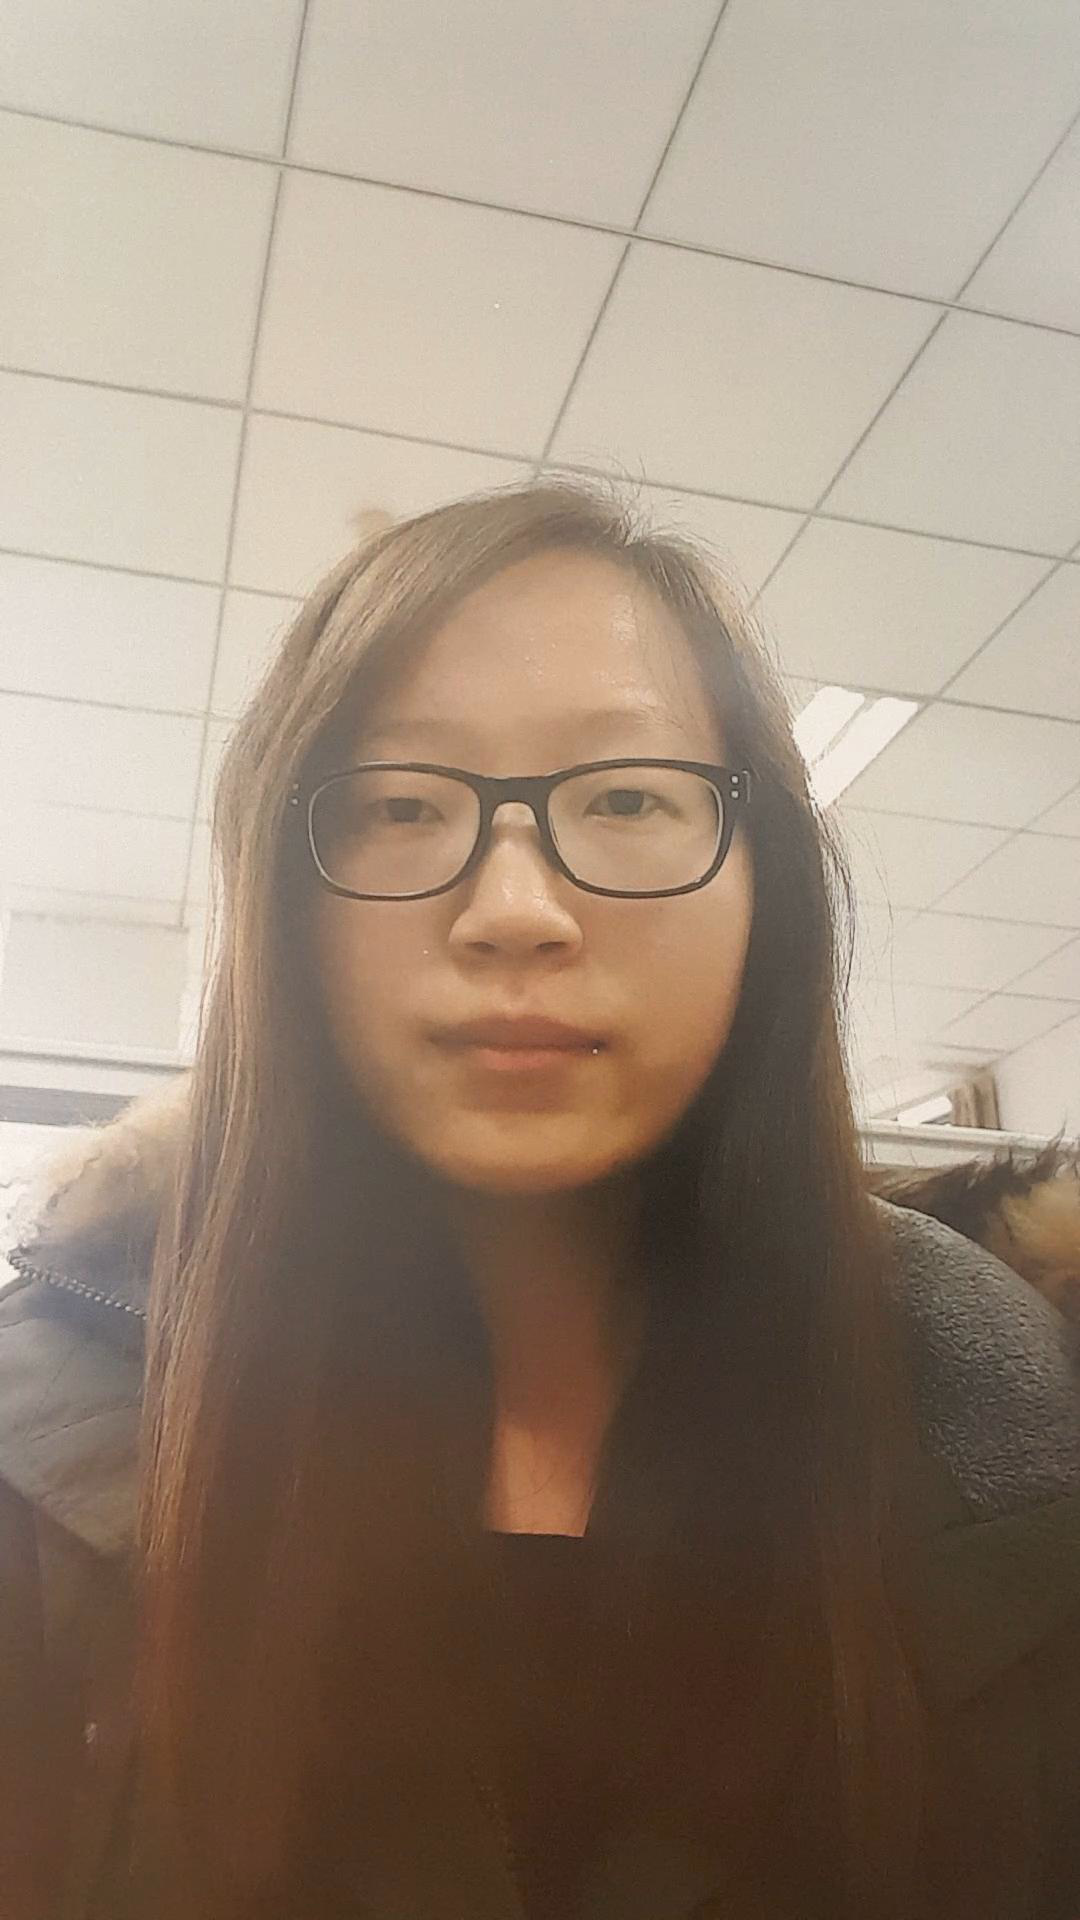

In [2]:
from PIL import Image
Image.open('/content/drive/MyDrive/Face_detection/test.jpg')

In [ ]:
!chmod +x ./darknet

In [ ]:
!./darknet detector test /content/drive/MyDrive/Face_detection/cfg/face.data ../Face_detection/cfg/yolov4-tiny-obj.cfg ../Face_detection/cfg/weights/yolov4-tiny-obj_last.weights ../Face_detection/test.jpg -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route

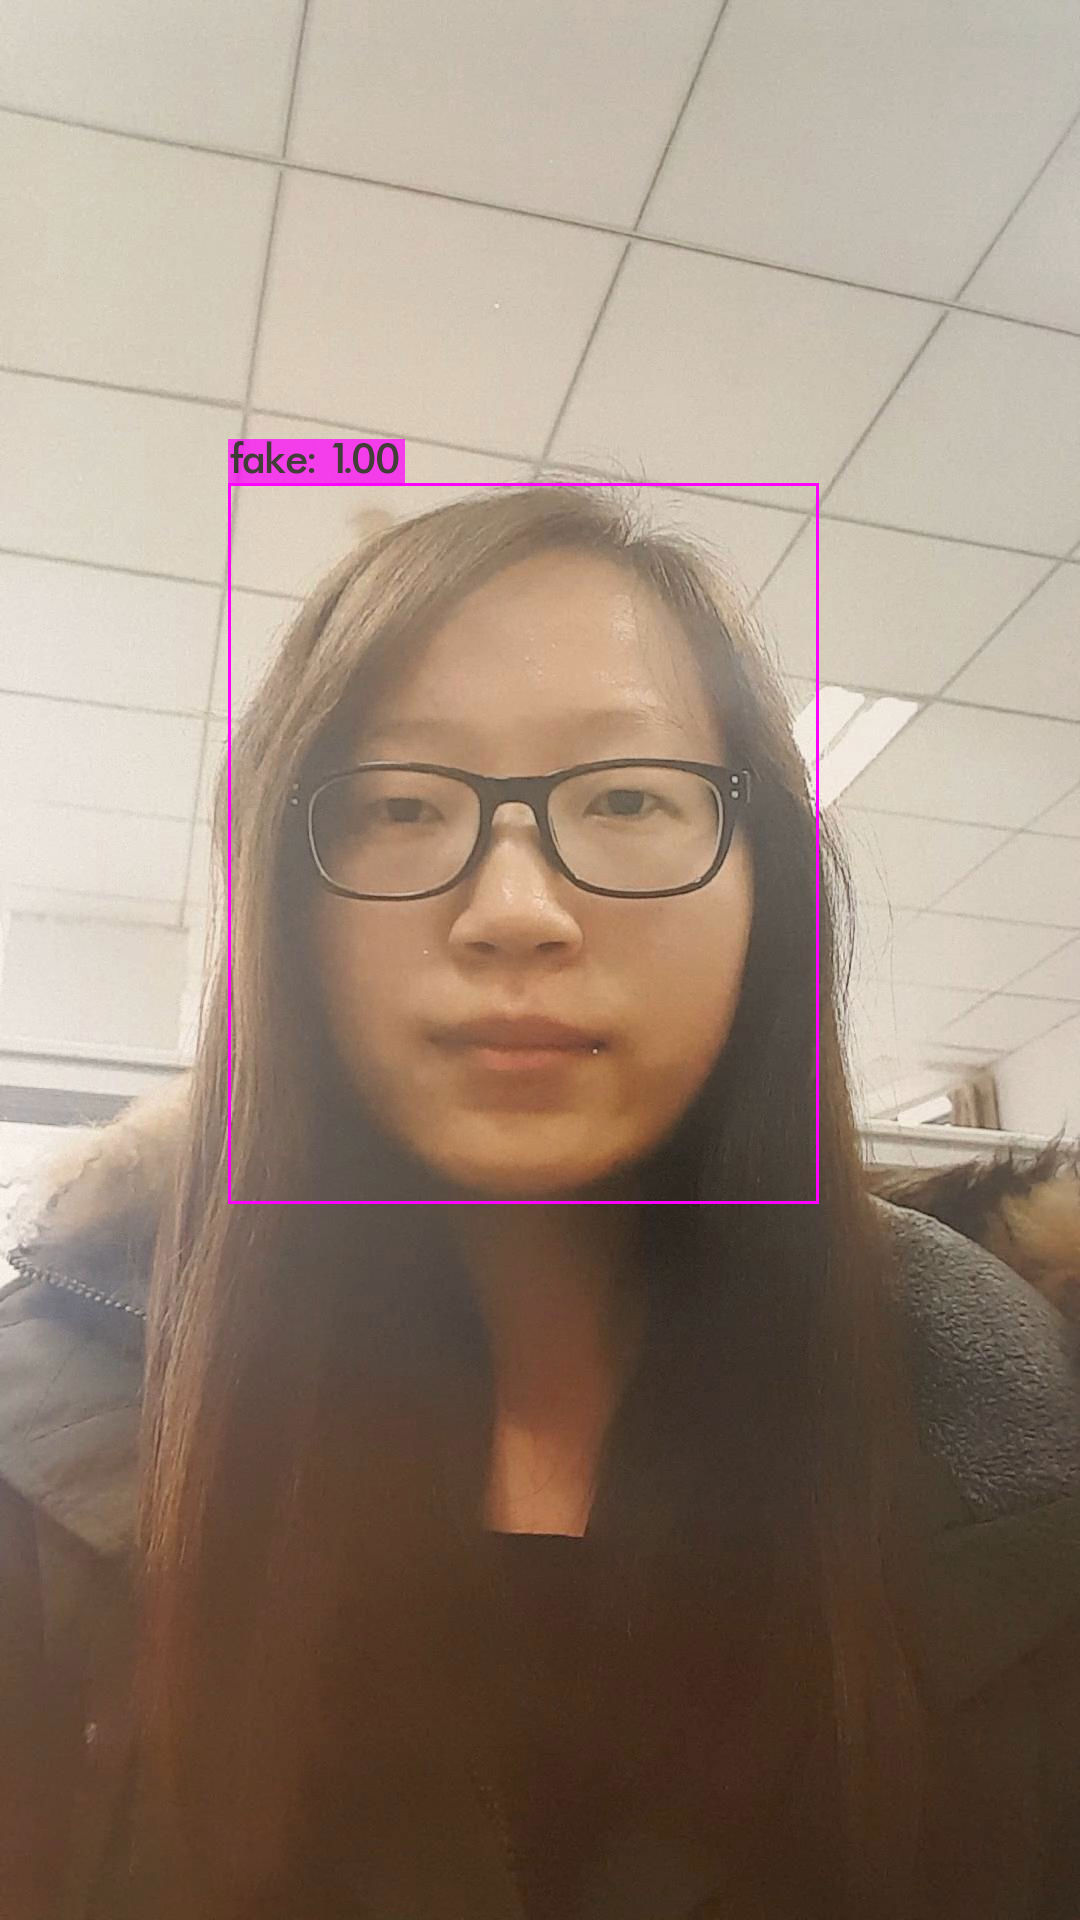

In [ ]:
from PIL import Image
Image.open('predictions.jpg')

In [ ]:
!./darknet detector map /content/drive/MyDrive/Face_detection/cfg/face.data ../Face_detection/cfg/yolov4-tiny-obj.cfg ../Face_detection/cfg/weights/yolov4-tiny-obj_last.weights -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route